## Required Imports and Helper functions taken from the coursera project

In [6]:
pip install librosa

     |████████████████████████████████| 1.6MB 32.2MB/s eta 0:00:01
     |████████████████████████████████| 327kB 32.5MB/s eta 0:00:01
     |████████████████████████████████| 3.5MB 48.4MB/s eta 0:00:01
     |████████████████████████████████| 20.2MB 51.5MB/s eta 0:00:01
  Stored in directory: /home/suman/.cache/pip/wheels/49/1d/38/c8ad12fcad67569d8e730c3275be5e581bd589558484a0f881
  Stored in directory: /home/suman/.cache/pip/wheels/b9/64/09/0b6417df9d8ba8bc61a7d2553c5cebd714ec169644c88fc012
  Stored in directory: /home/suman/.cache/pip/wheels/fa/c1/56/e0e12c6f7f3d2cdea9712b35136a2d40a7817c6210ec096485
Successfully built librosa audioread resampy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras
print(keras.backend.backend())

Using TensorFlow backend.


tensorflow


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [3]:

from tensorflow.python.client import device_lib
def get_available_devices():
    local_devices_photo=device_lib.list_local_devices()
    return [x.name for x in local_devices_photo]
print (get_available_devices())

['/device:CPU:0', '/device:XLA_GPU:0', '/device:XLA_CPU:0', '/device:GPU:0']


In [4]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from pydub.playback import play
import librosa as lr

# Calculate and plot spectrogram for a wav audio file

# Load a wav file
def get_wav_info(wav_file):
    data, rate = lr.load(path=wav_file,sr=44100)
    return rate, data

# Used to standardize volume of audio clip
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

# Load raw audio files for speech synthesis
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft =  200#of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins,im= plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins,im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx,freqs,bins

def load_raw_audio():
    positives = []
    backgrounds = []
    negatives = []
    for filename in os.listdir("positives"):
        if filename.endswith("wav"):
            positive = AudioSegment.from_wav("positives/"+filename)
            positives.append(positive)
    for filename in os.listdir("backgrounds"):
        if filename.endswith("wav"):
            background = AudioSegment.from_wav("backgrounds/"+filename)
            backgrounds.append(background)
    for filename in os.listdir("negatives"):
        if filename.endswith("wav"):
            negative = AudioSegment.from_wav("negatives/"+filename)
            negatives.append(negative)
    return positives,negatives, backgrounds

/anaconda/envs/py36/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/pydub/utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [6]:
import IPython.display as ipd
#ipd.Audio("positives/1.wav")
#ipd.Audio("negatives/1.wav")
#ipd.Audio("backgrounds_before_processing/white_noise.wav")

### Converting the background noises to 10s clips

In [7]:
ac_noise=AudioSegment.from_wav("backgrounds_before_processing/ac_noise.wav")

In [8]:
time=10*1000
ac_noise_clipped=ac_noise[:time]

In [9]:
ac_noise_clipped.export("backgrounds/ac_noise_clipped.wav",format="wav")

<_io.BufferedRandom name='backgrounds/ac_noise_clipped.wav'>

In [10]:
pink_noise=AudioSegment.from_wav("backgrounds_before_processing/pink_noise.wav")

In [11]:
pink_noise_clipped=pink_noise[:time]

In [12]:
pink_noise_clipped.export("backgrounds/pink_noise_clipped.wav",format="wav")

<_io.BufferedRandom name='backgrounds/pink_noise_clipped.wav'>

In [13]:
white_noise=AudioSegment.from_wav("backgrounds_before_processing/white_noise.wav")

In [14]:
white_noise_clipped=white_noise[:time]

In [15]:
white_noise_clipped.export("backgrounds_before_processing/white_noise_clipped.wav",format="wav")

<_io.BufferedRandom name='backgrounds_before_processing/white_noise_clipped.wav'>

In [16]:
doing_the_dishes_noise=AudioSegment.from_wav("backgrounds_before_processing/doing_the_dishes_noise.wav")

In [17]:
doing_the_dishes_noise_clipped=doing_the_dishes_noise[:time]

In [18]:
doing_the_dishes_noise_clipped.export("backgrounds/doing_the_dishes_noise_clipped.wav",format="wav")

<_io.BufferedRandom name='backgrounds/doing_the_dishes_noise_clipped.wav'>

# The original sampling rates for the noises are:
ac_noise=> 48000
doing_the_dishes_noise=>16000
pink_noise=>16000
white_noise=>16000

In [19]:
rate,audio=get_wav_info("backgrounds_before_processing/white_noise.wav")

In [20]:
rate,audio.shape

(44100, (2646000,))

there is a small confusion! the audio part of the ac_noise read using wavfile.read from scipy gives a two dimensional array but if its read using librosa that problem is done, still the no of samples in the ac_noise and ac_noise_clipped is different

In [21]:
rate,audio=get_wav_info("backgrounds_before_processing/ac_noise.wav")

In [22]:
audio.shape,rate

((572948,), 44100)

###          







### Checking if the clipping is proper and analysing various rates and audio files

In [23]:
rate1,audio1=get_wav_info("negatives/1.wav")

In [24]:
print(rate1,audio1.shape)

44100 (44100,)


## Now all the audio files are ready to be used, you can get the rate and the audio array by just calling the function get_wav_info

In [25]:
rate3,audio3=get_wav_info("positives/2.wav")

In [26]:
print(rate3,audio3.shape)

44100 (20479,)


(101, 254)
(101,)
(254,)


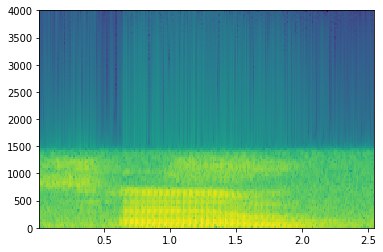

In [27]:
f,g,h=graph_spectrogram("positives/2.wav")
print(f.shape)
print(g.shape)
print(h.shape)


# Starting to build the training dataset

In [28]:
#activates, negatives, backgrounds 
positives,negatives,backgrounds= load_raw_audio()

In [29]:
#for audio in negatives:
   # play(audio)

In [30]:
print("background_len:",len(backgrounds[3]))
print("activates_len:",len(positives[11]))
print("negative_len:",len(negatives[2]))

background_len: 10000
activates_len: 415
negative_len: 1000


# Helper functions needed to prepare the dataset
1. get_random_time_segment(segment_ms) gets a random time segment in our background audio
2. is_overlapping(segment_time, existing_segments) checks if a time segment overlaps with existing segments
3. insert_audio_clip(background, audio_clip, existing_times) inserts an audio segment at a random time in our background audio 4. using get_random_time_segment and is_overlapping
5. insert_ones(y, segment_end_ms) inserts 1's into our label vector y after the word "activate"

In [31]:
def get_random_time_segment(segment_ms):
    """
    Gets a random time segment of duration segment_ms in a 10,000 ms audio clip.
    
    Arguments:
    segment_ms -- the duration of the audio clip in ms ("ms" stands for "milliseconds")
    
    Returns:
    segment_time -- a tuple of (segment_start, segment_end) in ms
    """
    
    segment_start = np.random.randint(low=0, high=10000-segment_ms)   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)

In [32]:
def is_overlapping(segment_time, previous_segments):
    """
    Checks if the time of a segment overlaps with the times of existing segments.
    
    Arguments:
    segment_time -- a tuple of (segment_start, segment_end) for the new segment
    previous_segments -- a list of tuples of (segment_start, segment_end) for the existing segments
    
    Returns:
    True if the time segment overlaps with any of the existing segments, False otherwise
    """
    
    segment_start, segment_end = segment_time
    
    ### START CODE HERE ### (≈ 4 line)
    # Step 1: Initialize overlap as a "False" flag. (≈ 1 line)
    overlap = False
    
    # Step 2: loop over the previous_segments start and end times.
    # Compare start/end times and set the flag to True if there is an overlap (≈ 3 lines)
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True
    ### END CODE HERE ###

    return overlap

In [33]:
def insert_audio_clip(background, audio_clip, previous_segments):
    """
    Insert a new audio segment over the background noise at a random time step, ensuring that the 
    audio segment does not overlap with existing segments.
    
    Arguments:
    background -- a 10 second background audio recording.  
    audio_clip -- the audio clip to be inserted/overlaid. 
    previous_segments -- times where audio segments have already been placed
    
    Returns:
    new_background -- the updated background audio
    """
    
    # Get the duration of the audio clip in ms
    segment_ms = len(audio_clip)
    
    ### START CODE HERE ### 
    # Step 1: Use one of the helper functions to pick a random time segment onto which to insert 
    # the new audio clip. (≈ 1 line)
    segment_time = get_random_time_segment(segment_ms)
    
    # Step 2: Check if the new segment_time overlaps with one of the previous_segments. If so, keep 
    # picking new segment_time at random until it doesn't overlap. (≈ 2 lines)
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)

    # Step 3: Add the new segment_time to the list of previous_segments (≈ 1 line)
    previous_segments.append(segment_time)
    ### END CODE HERE ###
    
    # Step 4: Superpose audio segment and background
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

In [34]:

audio_clip, segment_time = insert_audio_clip(backgrounds[0], positives[16], [(3790, 4400)])

print("Segment Time: ", segment_time)
#play(audio_clip)

Segment Time:  (450, 1127)


In [35]:
Ty=1375
def insert_ones(y, segment_end_ms):
    """
    Update the label vector y. The labels of the 50 output steps strictly after the end of the segment 
    should be set to 1. By strictly we mean that the label of segment_end_y should be 0 while, the
    50 followinf labels should be ones.
    
    
    Arguments:
    y -- numpy array of shape (1, Ty), the labels of the training example
    segment_end_ms -- the end time of the segment in ms
    
    Returns:
    y -- updated labels
    """
    
    # duration of the background (in terms of spectrogram time-steps)
    segment_end_y = int(segment_end_ms * Ty / 10000.0)
    
    # Add 1 to the correct index in the background label (y)
    ### START CODE HERE ### (≈ 3 lines)
    for i in range(segment_end_y + 1, segment_end_y + 51):
        if i < Ty:
            y[0, i] = 1
    ### END CODE HERE ###
    
    return y


In [36]:
def create_training_example(background, positives, negatives):
    """
    Creates a training example with a given background, activates, and negatives.
    
    Arguments:
    background -- a 10 second background audio recording
    activates -- a list of audio segments of the word "activate"
    negatives -- a list of audio segments of random words that are not "activate"
    
    Returns:
    x -- the spectrogram of the training example
    y -- the label at each time step of the spectrogram
    """
    
    # Set the random seed
    #np.random.seed(18)
    Ty=1375
    # Make background quieter
    background = background - 20
    ### START CODE HERE ###
    # Step 1: Initialize y (label vector) of zeros (≈ 1 line)
    y = np.zeros((1, Ty))

    # Step 2: Initialize segment times as empty list (≈ 1 line)
    previous_segments = []
    ### END CODE HERE ###
    
    # Select 0-4 random "activate" audio clips from the entire list of "activates" recordings
    number_of_positives = np.random.randint(0, 4)
    random_indices = np.random.randint(len(positives), size=number_of_positives)
    random_positives = [positives[i] for i in random_indices]
    
    ### START CODE HERE ### (≈ 3 lines)
    # Step 3: Loop over randomly selected "activate" clips and insert in background
    for random_positive in random_positives:
        # Insert the audio clip on the background
        background, segment_time = insert_audio_clip(background, random_positive, previous_segments)
        # Retrieve segment_start and segment_end from segment_time
        segment_start, segment_end = segment_time
        # Insert labels in "y"
        y = insert_ones(y, segment_end_ms=segment_end)
    ### END CODE HERE ###

    # Select 0-2 random negatives audio recordings from the entire list of "negatives" recordings
    number_of_negatives = np.random.randint(0, 4)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]
    
    ### START CODE HERE ### (≈ 2 lines)
    # Step 4: Loop over randomly selected negative clips and insert in background
    for random_negative in random_negatives:
        # Insert the audio clip on the background 
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
        
    ### END CODE HERE ###
    
    # Standardize the volume of the audio clip 
    background = match_target_amplitude(background, -20.0)

    # Export new training example 
    file_handle = background.export("train" + ".wav", format="wav")
   # print("File (train.wav) was saved in your directory.")
    
    # Get and plot spectrogram of the new recording (background with superposition of positive and negatives)
    x,freqs,bins = graph_spectrogram("train.wav")
    
    return x,y,background

# Let *Tx* be the no of timesteps fed to model from the spectrogram and *Ty* be the no of timesteps in the output given by the model to be built
Tx=5511
Ty=1375

/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7725: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(101, 5511)
(1, 1375)


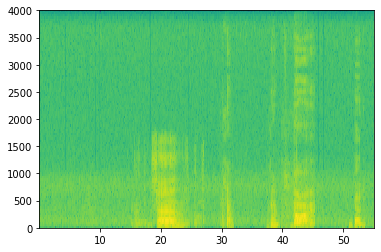

In [37]:
x2,y2,back=create_training_example(backgrounds[1], positives, negatives)
np.transpose(x2).shape
print(x2.shape)
print(y2.shape)

In [38]:
np.set_printoptions(threshold=np.inf)

In [39]:

#print(y2[0][610:])
#play(z2)
#print(p2)

# the task here onwards is to verify that the labels are correct and then we can start building the model.

# all the labels are correct, now lets build a dataset

In [40]:
#x_training=[]
#y_training=[]
#audio_training=[]
#for i in range(1000):
#    x,y,z=create_training_example(backgrounds[1], positives, negatives)
#    x_training.append(np.transpose(x))
#    y_training.append(np.transpose(y))
#    if(i%100==0):
#        print(i)
  # audio_training.append(z)
#np.save("x_training.npy",x_training)
#np.save("y_training.npy",y_training)

In [41]:
#play(audio_training[255])


In [42]:
#audio_training[0].export("op.wav",format="wav")

In [43]:
#rate,audio=get_wav_info("op.wav")
#print(rate)

In [44]:
#play(audio_training[98])

In [45]:
x_train=np.load("x_training.npy")
y_train=np.load("y_training.npy")

In [46]:
print(x_train[0].shape)
print(y_train[0].shape)


(5511, 101)
(1375, 1)


In [47]:
import keras
print(keras.__version__)

2.2.4


In [48]:
from keras import backend as k
k.tensorflow_backend._get_available_gpus()

W0830 05:21:41.918195 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0830 05:21:41.919152 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0830 05:21:41.920105 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0830 05:21:41.961111 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



['/job:localhost/replica:0/task:0/device:GPU:0']

In [49]:
import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

# model building

In [50]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model,load_model,Sequential
from keras.layers import Dense,Activation,Dropout,Input,Masking,TimeDistributed,LSTM,Conv1D
from keras.layers import GRU,Bidirectional,BatchNormalization,Reshape
from keras.optimizers import Adam
def model(input_shape):
    X_input=Input(shape=input_shape)
    X=Conv1D(196,kernel_size=15,strides=4)(X_input)
    X = BatchNormalization()(X)      
    X = Activation('relu')(X) 
    X = Dropout(0.8)(X)  
    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(units = 128, return_sequences = True)(X) # GRU (use 128 units and return the sequences)
    X = Dropout(0.8)(X)                                 # dropout (use 0.8)
    X = BatchNormalization()(X)     # Batch normalization
    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(units = 128, return_sequences = True)(X)   # GRU (use 128 units and return the sequences)
    X = Dropout(0.8)(X)                                 # dropout (use 0.8)
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Dropout(0.8)(X)                                  # dropout (use 0.8)
   
    # Step 4: Time-distributed dense layer (≈1 line)
    X = TimeDistributed(Dense(1, activation = "sigmoid"))(X) # time distributed  (sigmoid)
    model = Model(inputs = X_input, outputs = X)
    return model

In [51]:
model = model(input_shape = (5511, 101))
model.summary()

W0830 05:21:47.516109 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 05:21:47.753357 140098258339584 deprecation.py:506] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0830 05:21:47.754286 140098258339584 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0830 05:21:48.044387 140098258339584 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5511, 101)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1375, 196)         297136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1375, 196)         784       
_________________________________________________________________
activation_1 (Activation)    (None, 1375, 196)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 196)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1375, 128)         124800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1375, 128)         0         
__________

In [52]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
#adding checkpoint
filepath="weights_best.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor="val_acc",save_best_only=True,mode="auto",verbose=1)
callbacks_list=[checkpoint]


W0830 05:21:51.086812 140098258339584 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 05:21:51.096031 140098258339584 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [53]:
from sklearn.model_selection import train_test_split
x_training,x_testing,y_training,y_testing=train_test_split(x_train,y_train,test_size=0.33,random_state=42)
np.save("x_testing",x_testing)
np.save("y_testing",y_testing)

In [ ]:
import time
start=time.time()
print(start)
model.fit(x_training, y_training, batch_size = 5, epochs=100,verbose=1,callbacks=callbacks_list,validation_data=(x_testing,y_testing))
end=time.time()
print(end)
print(end-start)

1567143614.6658883
Train on 670 samples, validate on 330 samples
Epoch 1/100
670/670 [==============================] - 531s 792ms/step - loss: 0.7819 - acc: 0.7344 - val_loss: 1.5155 - val_acc: 0.0559

Epoch 00001: val_acc improved from -inf to 0.05588, saving model to weights_best.hdf5
Epoch 2/100
670/670 [==============================] - 505s 754ms/step - loss: 0.7307 - acc: 0.8703 - val_loss: 0.4932 - val_acc: 0.9154

Epoch 00002: val_acc improved from 0.05588 to 0.91539, saving model to weights_best.hdf5
Epoch 3/100
670/670 [==============================] - 501s 748ms/step - loss: 0.7049 - acc: 0.9017 - val_loss: 0.6965 - val_acc: 0.9001

Epoch 00003: val_acc did not improve from 0.91539
Epoch 4/100
670/670 [==============================] - 492s 734ms/step - loss: 0.6827 - acc: 0.9149 - val_loss: 0.5663 - val_acc: 0.9169

Epoch 00004: val_acc improved from 0.91539 to 0.91688, saving model to weights_best.hdf5
Epoch 5/100
665/670 [============================>.] - ETA: 3s - loss

# first training - 100 examples 100 epochs 0.8506 accuracy loss - 0.5591930794715881 most predictions were having probability of 0.39...
# second training- 1000 examples 1000 epochs 

# Evaluate the model

In [47]:
loss, acc = model.evaluate(x_train, y_train)
print("Dev set accuracy = ", acc,loss)

5/5 [==============================] - 2s 318ms/step
Dev set accuracy =  0.9458909034729004 0.5650323033332825


# Making predictions

In [54]:
def detect_triggerword(i):
    #plt.subplot(2, 1, 1)

    #x,y,z = graph_spectrogram(filename)
    
    #x  = x.swapaxes(0,1)
    x=x_train[i]
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
   # plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show()
    return predictions

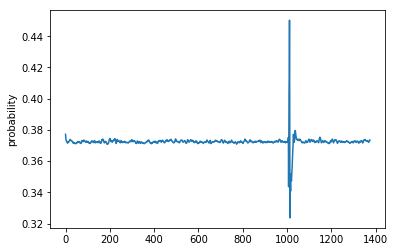

array([[[0.37715948],
        [0.37496638],
        [0.37381577],
        [0.37309074],
        [0.37308955],
        [0.37268403],
        [0.3722142 ],
        [0.37216687],
        [0.37180614],
        [0.37150276],
        [0.37188286],
        [0.37216026],
        [0.3721714 ],
        [0.3720047 ],
        [0.37224644],
        [0.37241593],
        [0.37261766],
        [0.37304276],
        [0.37314445],
        [0.37338296],
        [0.37384292],
        [0.3738704 ],
        [0.37384248],
        [0.37354356],
        [0.3733285 ],
        [0.3731954 ],
        [0.37287375],
        [0.37292385],
        [0.3729148 ],
        [0.37290034],
        [0.372749  ],
        [0.3725866 ],
        [0.37246832],
        [0.37179235],
        [0.37195837],
        [0.37191042],
        [0.3715615 ],
        [0.3716448 ],
        [0.37177235],
        [0.37153864],
        [0.37165606],
        [0.3713088 ],
        [0.3712982 ],
        [0.37135386],
        [0.37128052],
        [0

In [55]:
detect_triggerword(4)

In [51]:
print (x.shape,y.shape,z.shape)

NameError: name 'x' is not defined

In [57]:
model.save("smu.HDf5")